In [1]:
import pandas as pd

In [2]:
star_data = pd.read_csv("https://raw.githubusercontent.com/charlieaxle/cs7461_1/master/HTRU_2.csv", names=["mean_int_prof","std_int_prof","excess_kurtosis_int_prof","skewness_int_prof","mean_dm_snr",
                                            "std_dm_snr","excess_kurtosis_dm_snr","skewness_dm_snr","class"],index_col=False)

star_data.head()

In [3]:
star_data.head()

,mean_int_prof,std_int_prof,excess_kurtosis_int_prof,skewness_int_prof,mean_dm_snr,std_dm_snr,excess_kurtosis_dm_snr,skewness_dm_snr,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
attributes = list(star_data.columns.values)
attributes.remove("class")

X = star_data[attributes]
y = star_data['class']
for col in attributes:
    col_min = star_data[col].min()
    col_max =  star_data[col].max()
    
    X[col] = (X[col]-col_min)/col_max

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=26)

In [8]:
from sklearn import tree
from sklearn.model_selection import validation_curve

In [10]:
train_scores, test_scores = validation_curve(estimator=tree.DecisionTreeClassifier(), X=X_train, y=y_train, param_name="max_depth",
                                            param_range =range(1,20), cv=5)

In [11]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

In [12]:
train_scores[0]

array([ 0.97784873,  0.97834764,  0.97794851,  0.97805048,  0.97815025])

(0.95, 1.01)

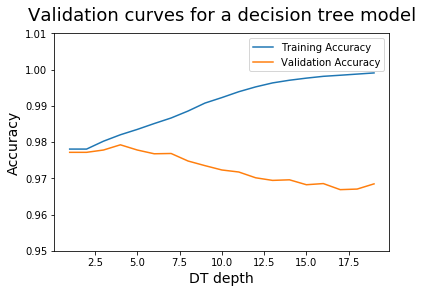

In [13]:
plt.plot(range(1,20), train_scores_mean, label = 'Training Accuracy')
plt.plot(range(1,20), test_scores_mean, label = 'Validation Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('DT depth', fontsize = 14)
plt.title('Validation curves for a decision tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.95,1.01)

In [9]:
from sklearn.model_selection import GridSearchCV

GSmodel = GridSearchCV(estimator = tree.DecisionTreeClassifier(),param_grid={"max_depth":range(1,100)}, cv=5)

In [11]:
import time
t0 = time.time()
GSmodel.fit(X_train, y_train)
print (time.time()-t0)

37.62620306015015


In [12]:
GSmodel.best_params_

{'max_depth': 4}

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSmodel,X_train, y_train,train_sizes= np.linspace(.1,1,10), cv=5)

In [21]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

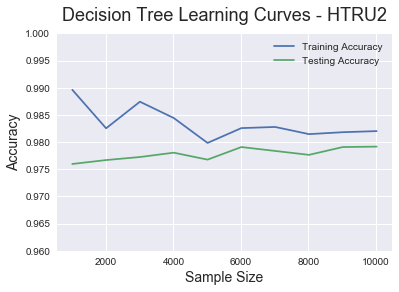

In [45]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Decision Tree Learning Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.96,1.0)
plt.savefig("HTRU_DT_LC.png")

In [23]:
y_pred = GSmodel.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

In [53]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, y_pred)

array([[4855,   34],
       [  87,  394]], dtype=int64)

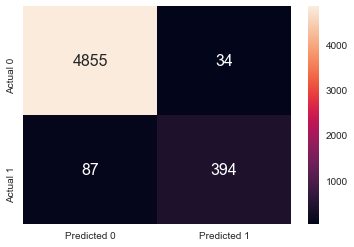

In [46]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_DT_conf_mat.png")

In [13]:
from sklearn import neighbors

In [16]:
train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(),X=X_train, y=y_train, param_name="n_neighbors", param_range=range(1,50,1), cv=5)

In [17]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

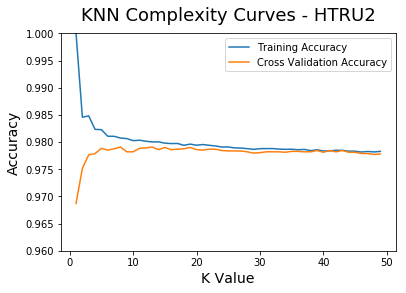

In [18]:
plt.plot(range(1,50,1),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,50,1),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('K Value', fontsize = 14)
plt.title('KNN Complexity Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.96,1)

plt.savefig("HTRU2_KNN_LC.png",bbox_inches="tight")

In [14]:
GSknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), cv=5, param_grid ={'n_neighbors':range(1,50)})

In [15]:
t0 = time.time()
GSknn.fit(X_train, y_train)
print (time.time()-t0)

88.07676649093628


In [16]:
GSknn.best_params_

{'n_neighbors': 8}

In [23]:
y_pred=GSknn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.97616387337057731

In [29]:
conf_mat=confusion_matrix(y_test, y_pred)

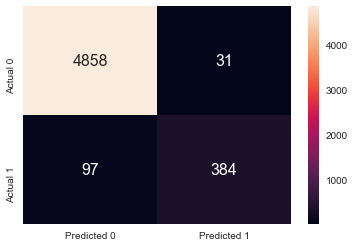

In [31]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_KNN_conf_mat.png")

In [2]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSknn,X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [38]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

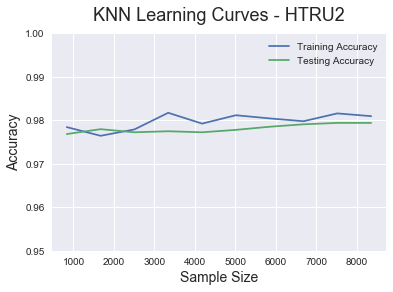

In [39]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('KNN Learning Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.95,1.0)
plt.savefig("HTRU_KNN_LC.png")

# Artificial Neural Networks

In [17]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

In [41]:
train_scores, valid_scores = validation_curve(estimator=MLPClassifier(max_iter=2000),X=X_train, y=y_train, param_name="hidden_layer_sizes", param_range=[(i,) for i in range(1,50)], cv=5)

In [42]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

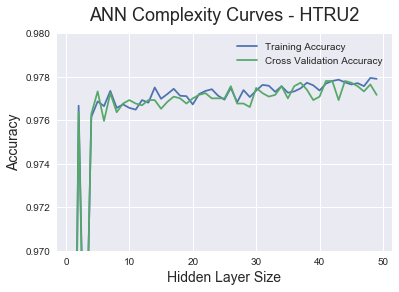

In [44]:
plt.plot(range(1,50),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,50),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Hidden Layer Size', fontsize = 14)
plt.title('ANN Complexity Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.97,.98)

plt.savefig("HTRU2_ANN_VC1.png",bbox_inches="tight")

In [13]:
GSann = GridSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_grid ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

NameError: name 'GridSearchCV' is not defined

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
RSann = RandomizedSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_distributions  ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

In [20]:
t0 = time.time()
RSann.fit(X_train, y_train)
print (time.time()-t0)

60.73455047607422


In [17]:
RSann.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (13,),
 'learning_rate': 'constant'}

In [20]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(RSann,X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [21]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

ValueError: x and y must have same first dimension, but have shapes (2,) and (10,)

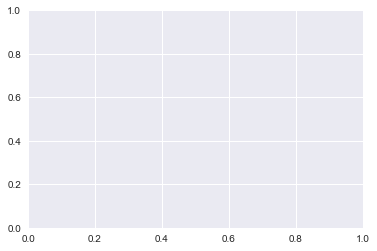

In [45]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('ANN Learning Curves - HTRU2', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.95,.98)
plt.savefig("HTRU_ANN_LC.png")

In [26]:
y_pred= RSann.predict(X_test)

In [27]:
accuracy_score(y_pred,y_test)

0.97355679702048414

In [28]:
conf_mat=confusion_matrix(y_test, y_pred)

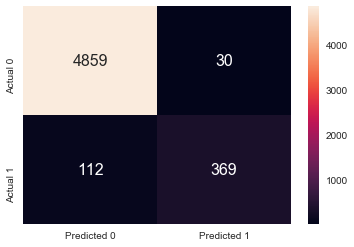

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_ANN_conf_mat.png")

In [35]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(RSann,X_train, y_train,train_sizes= (.01,.02),cv=5)

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  %

In [38]:
learn_train_scores.mean(axis=1)

array([ 0.978,  0.982])

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4)),X=X_train,y=y_train, param_name='n_estimators',
                                             param_range=range(1,20),cv=5)

In [12]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

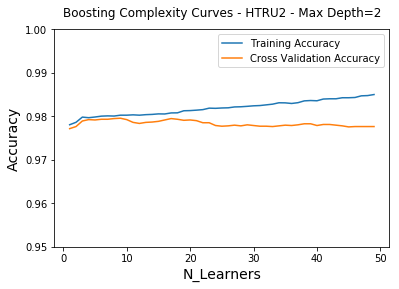

In [16]:
plt.plot(range(1,20),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,20),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('N_Learners', fontsize = 14)
plt.title('Boosting Complexity Curves - HTRU2 - Max Depth=2', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.95,1.)

plt.savefig("HTRU2_BOOST_VC_VC1.png",bbox_inches="tight")

In [22]:
GSboost = GridSearchCV(estimator=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4
                                                                                        )), cv=5, param_grid ={'n_estimators':range(1,20)})

In [23]:
t0 = time.time()
GSboost.fit(X_train,y_train)
print (time.time()-t0)

35.78652215003967


In [22]:
GSboost.best_params_

{'n_estimators': 1}

In [26]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSboost,X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [27]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

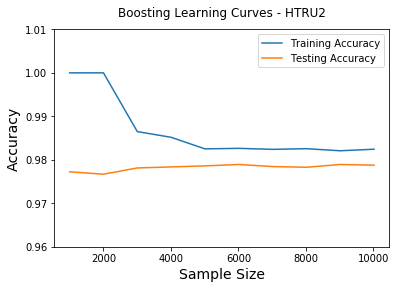

In [48]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Boosting Learning Curves - HTRU2', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.96,1.01)
plt.savefig("HTRU_BOOST_LC_1.png")

In [49]:
y_pred=GSboost.predict(X_test)

In [52]:
accuracy_score(y_pred,y_test)

0.97728119180633144

In [56]:
conf_mat =confusion_matrix(y_test, y_pred)

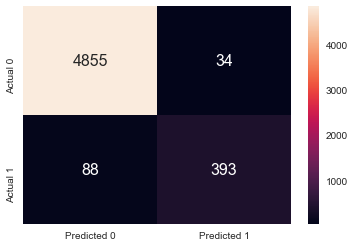

In [57]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_BOOST_conf_mat.png")

In [14]:
import sklearn.svm
from sklearn.svm import SVC

In [42]:
train_scores, valid_scores = validation_curve(SVC(),X=X_train, y=y_train, param_name="gamma", param_range=[.1,.25,.5,1,2,5,10], cv=5)

In [43]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

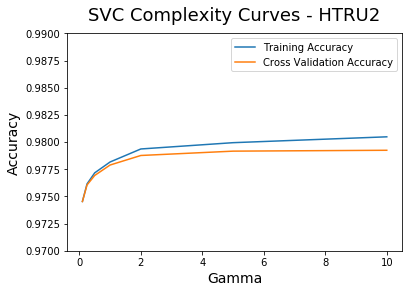

In [46]:
plt.plot([.1,.25,.5,1,2,5,10],train_scores_mean, label="Training Accuracy")
plt.plot([.1,.25,.5,1,2,5,10],valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Gamma', fontsize = 14)
plt.title('SVC Complexity Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.97,.99)

plt.savefig("HTRU2_SVC_VC1.png",bbox_inches="tight")

In [15]:
GSsvc = GridSearchCV(estimator=SVC(), cv=5, param_grid ={'gamma':[.1,.25,.5,.1,2,5,10],'kernel':['rbf','poly','sigmoid','linear']})

In [16]:
import time
t0 = time.time()
GSsvc.fit(X_train, y_train)
print (time.time()-t0)

57.08278226852417


In [17]:
GSsvc.best_params_

{'gamma': 5, 'kernel': 'poly'}

In [64]:
y_pred=GSsvc.predict(X_test)

In [65]:
accuracy_score(y_pred,y_test)

0.97839851024208568

In [66]:
conf_mat =confusion_matrix(y_test, y_pred)

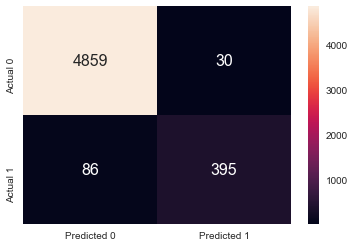

In [67]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_SVC_conf_mat.png")

In [18]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSsvc,X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [19]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

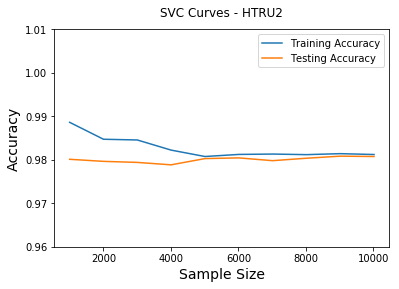

In [23]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('SVC Curves - HTRU2', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.96,1.01)
plt.savefig("HTRU_SVC_LC_1.png")